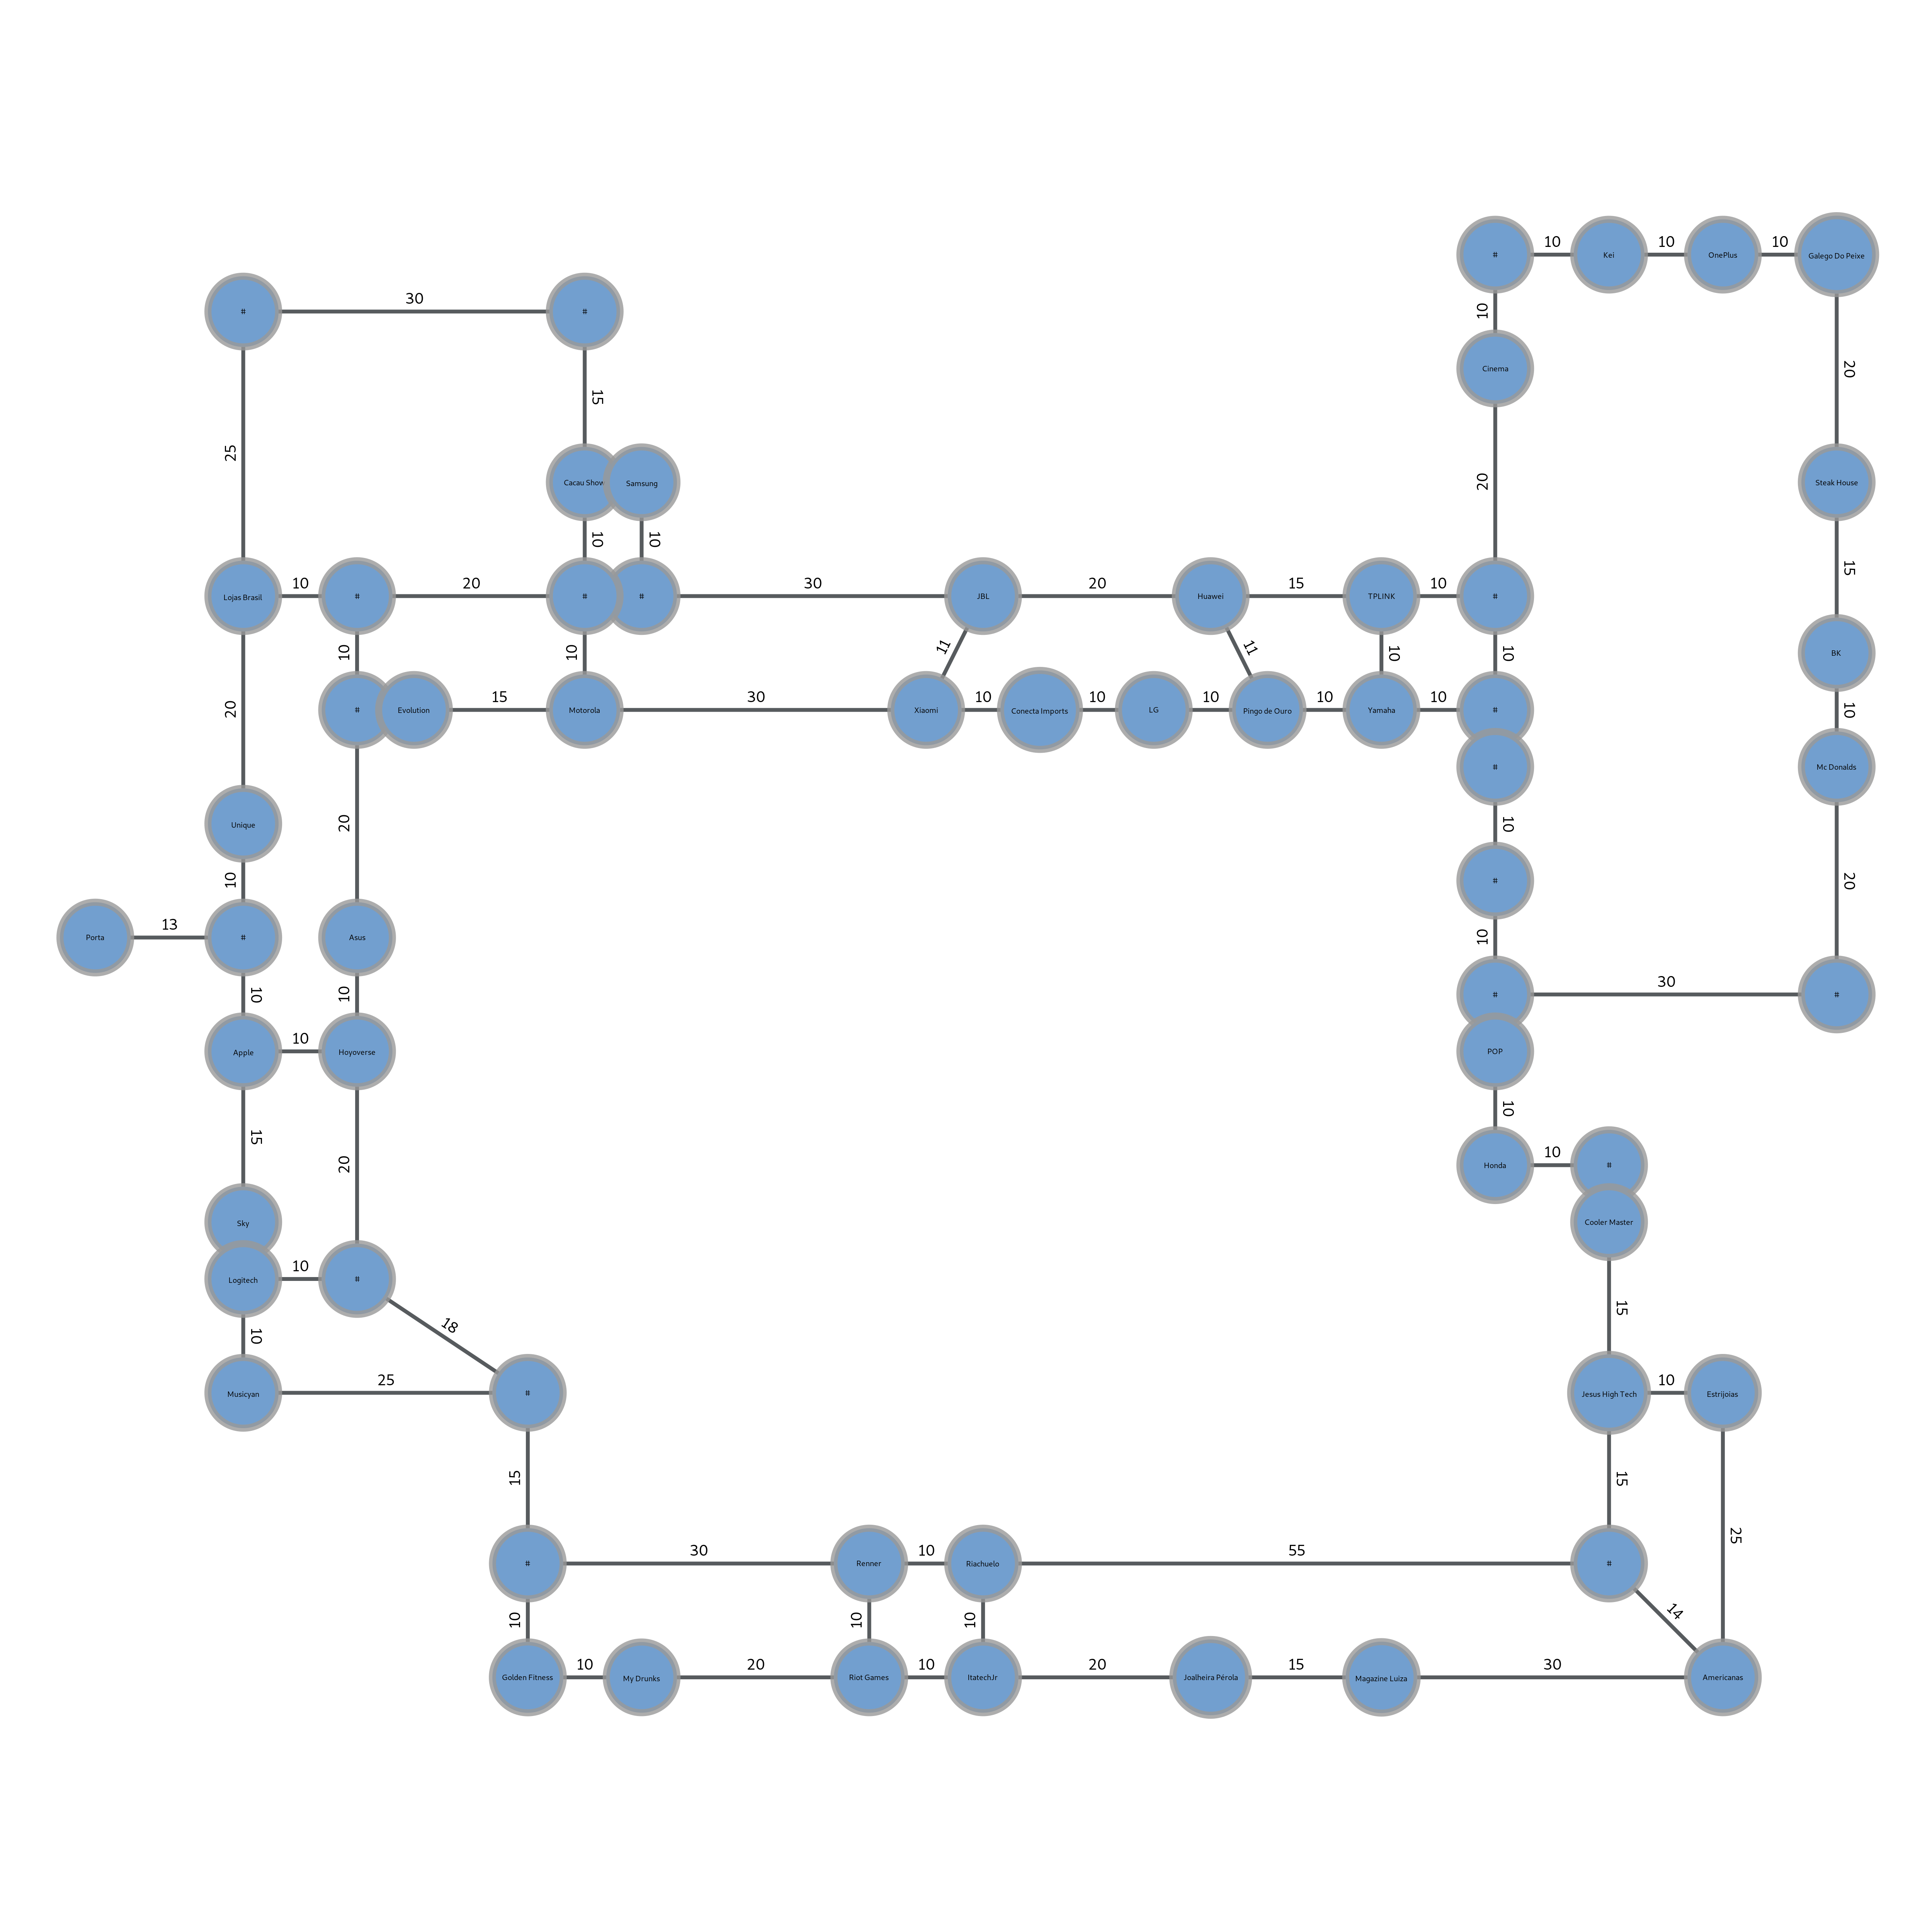

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f814212ba20, at 0x7f814212b9e8>

In [31]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    e_distance[e] = str(edge[3])
    
f_network.close()

#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])

#Desenhando o grafo
gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_distance,
               edge_pen_width = 10,              
               vertex_font_size=20,
               edge_font_size = 40,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")

Porta -> #
# -> Unique
Unique -> Lojas Brasil
Lojas Brasil -> #
# -> #
# -> Cacau Show
Cacau Show -> Samsung
Samsung -> #
# -> JBL
JBL -> Huawei
Huawei -> TPLINK
TPLINK -> #
# -> Cinema
Cinema -> #
# -> Kei
Kei -> OnePlus
OnePlus -> Galego Do Peixe
Galego Do Peixe -> Steak House
Steak House -> BK
BK -> Mc Donalds
Mc Donalds -> #
# -> #
# -> POP
POP -> Honda
Honda -> #
# -> Cooler Master
Cooler Master -> Jesus High Tech
Jesus High Tech -> Estrijoias
Estrijoias -> Americanas
Americanas -> Magazine Luiza
Magazine Luiza -> Joalheira Pérola
Joalheira Pérola -> ItatechJr
ItatechJr -> Riot Games
Riot Games -> My Drunks
My Drunks -> Golden Fitness
Golden Fitness -> #
# -> #
# -> #
# -> Hoyoverse
Hoyoverse -> Asus
Asus -> #
# -> Evolution
Evolution -> Motorola
Motorola -> #
# -> #
Motorola -> Xiaomi
Xiaomi -> Conecta Imports
Conecta Imports -> LG
LG -> Pingo de Ouro
Pingo de Ouro -> Yamaha
Yamaha -> #
# -> #
# -> #
Hoyoverse -> Apple
Apple -> Sky
Sky -> Logitech
Logitech -> Musicyan
# -> Renner

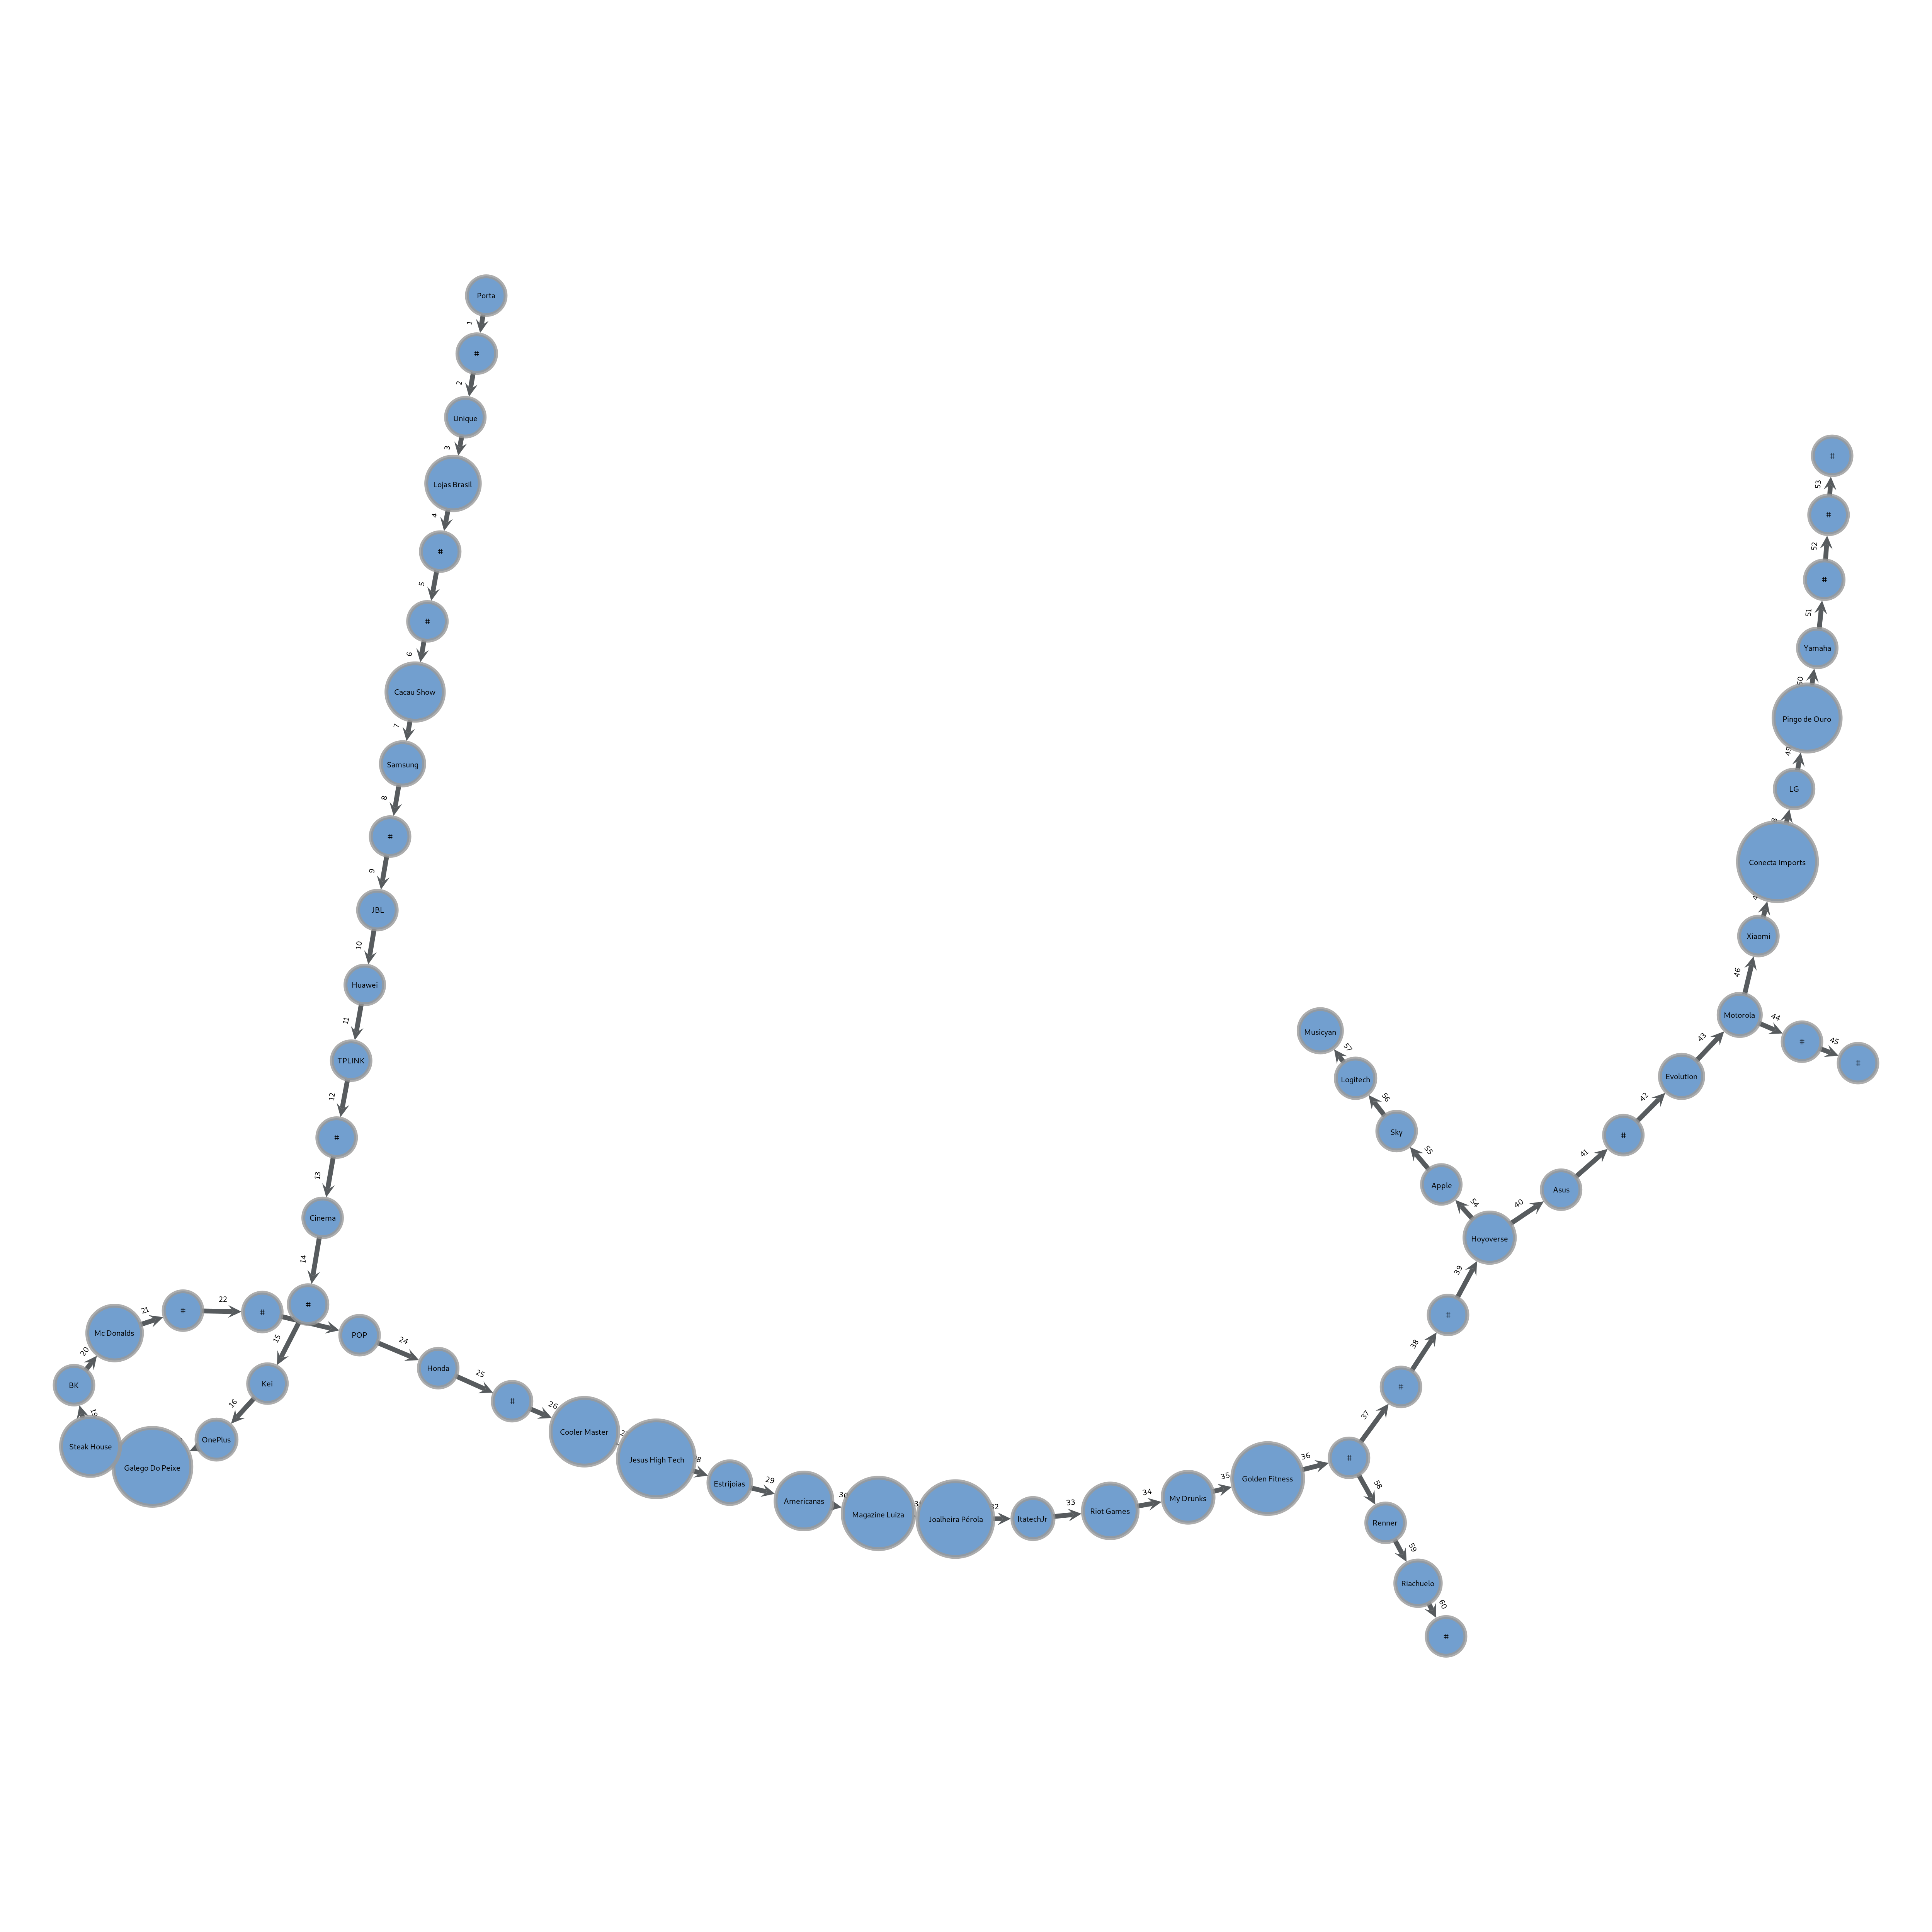

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f813e0ba0b8, at 0x7f813e0a8c50>

In [9]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_dfs = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_dfs = g_dfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_dfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int

f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_dfs.add_vertex()
    v_name_dfs[v] = str(vertice[1])
f_network.close()

ord = 1
for edge in gt.dfs_iterator(g, g.vertex(0)):
   #print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_dfs.add_edge(int(edge.source()), int(edge.target()))
#  print(vertice[1])
   e_ord[e] = ord
   ord += 1

#Desenhando o grafo
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_dfs,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_dfs,
              edge_text= e_ord,
              vertex_font_size=20,
              edge_font_size = 20,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")      



In [17]:
class VisitorExample(gt.DFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo dfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord): 
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_dfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        #self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count

    def finish_vertex(self, u):
        print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 


# In[6]:

---------------------------------------------
> Busca em Profundidade - Caminhamento pelos Estados
---------------------------------------------

--> Porta foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> Unique foi encontrado e entrou na FILA
--> Lojas Brasil foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> Cacau Show foi encontrado e entrou na FILA
--> Samsung foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> JBL foi encontrado e entrou na FILA
--> Huawei foi encontrado e entrou na FILA
--> TPLINK foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> Cinema foi encontrado e entrou na FILA
--> # foi encontrado e entrou na FILA
--> Kei foi encontrado e entrou na FILA
--> OnePlus foi encontrado e entrou na FILA
--> Galego Do Peixe foi encontrado e entrou na FILA
--> Steak House foi encontrado e entrou na FILA
--> BK foi encontrado e entrou na FILA
--> Mc Do

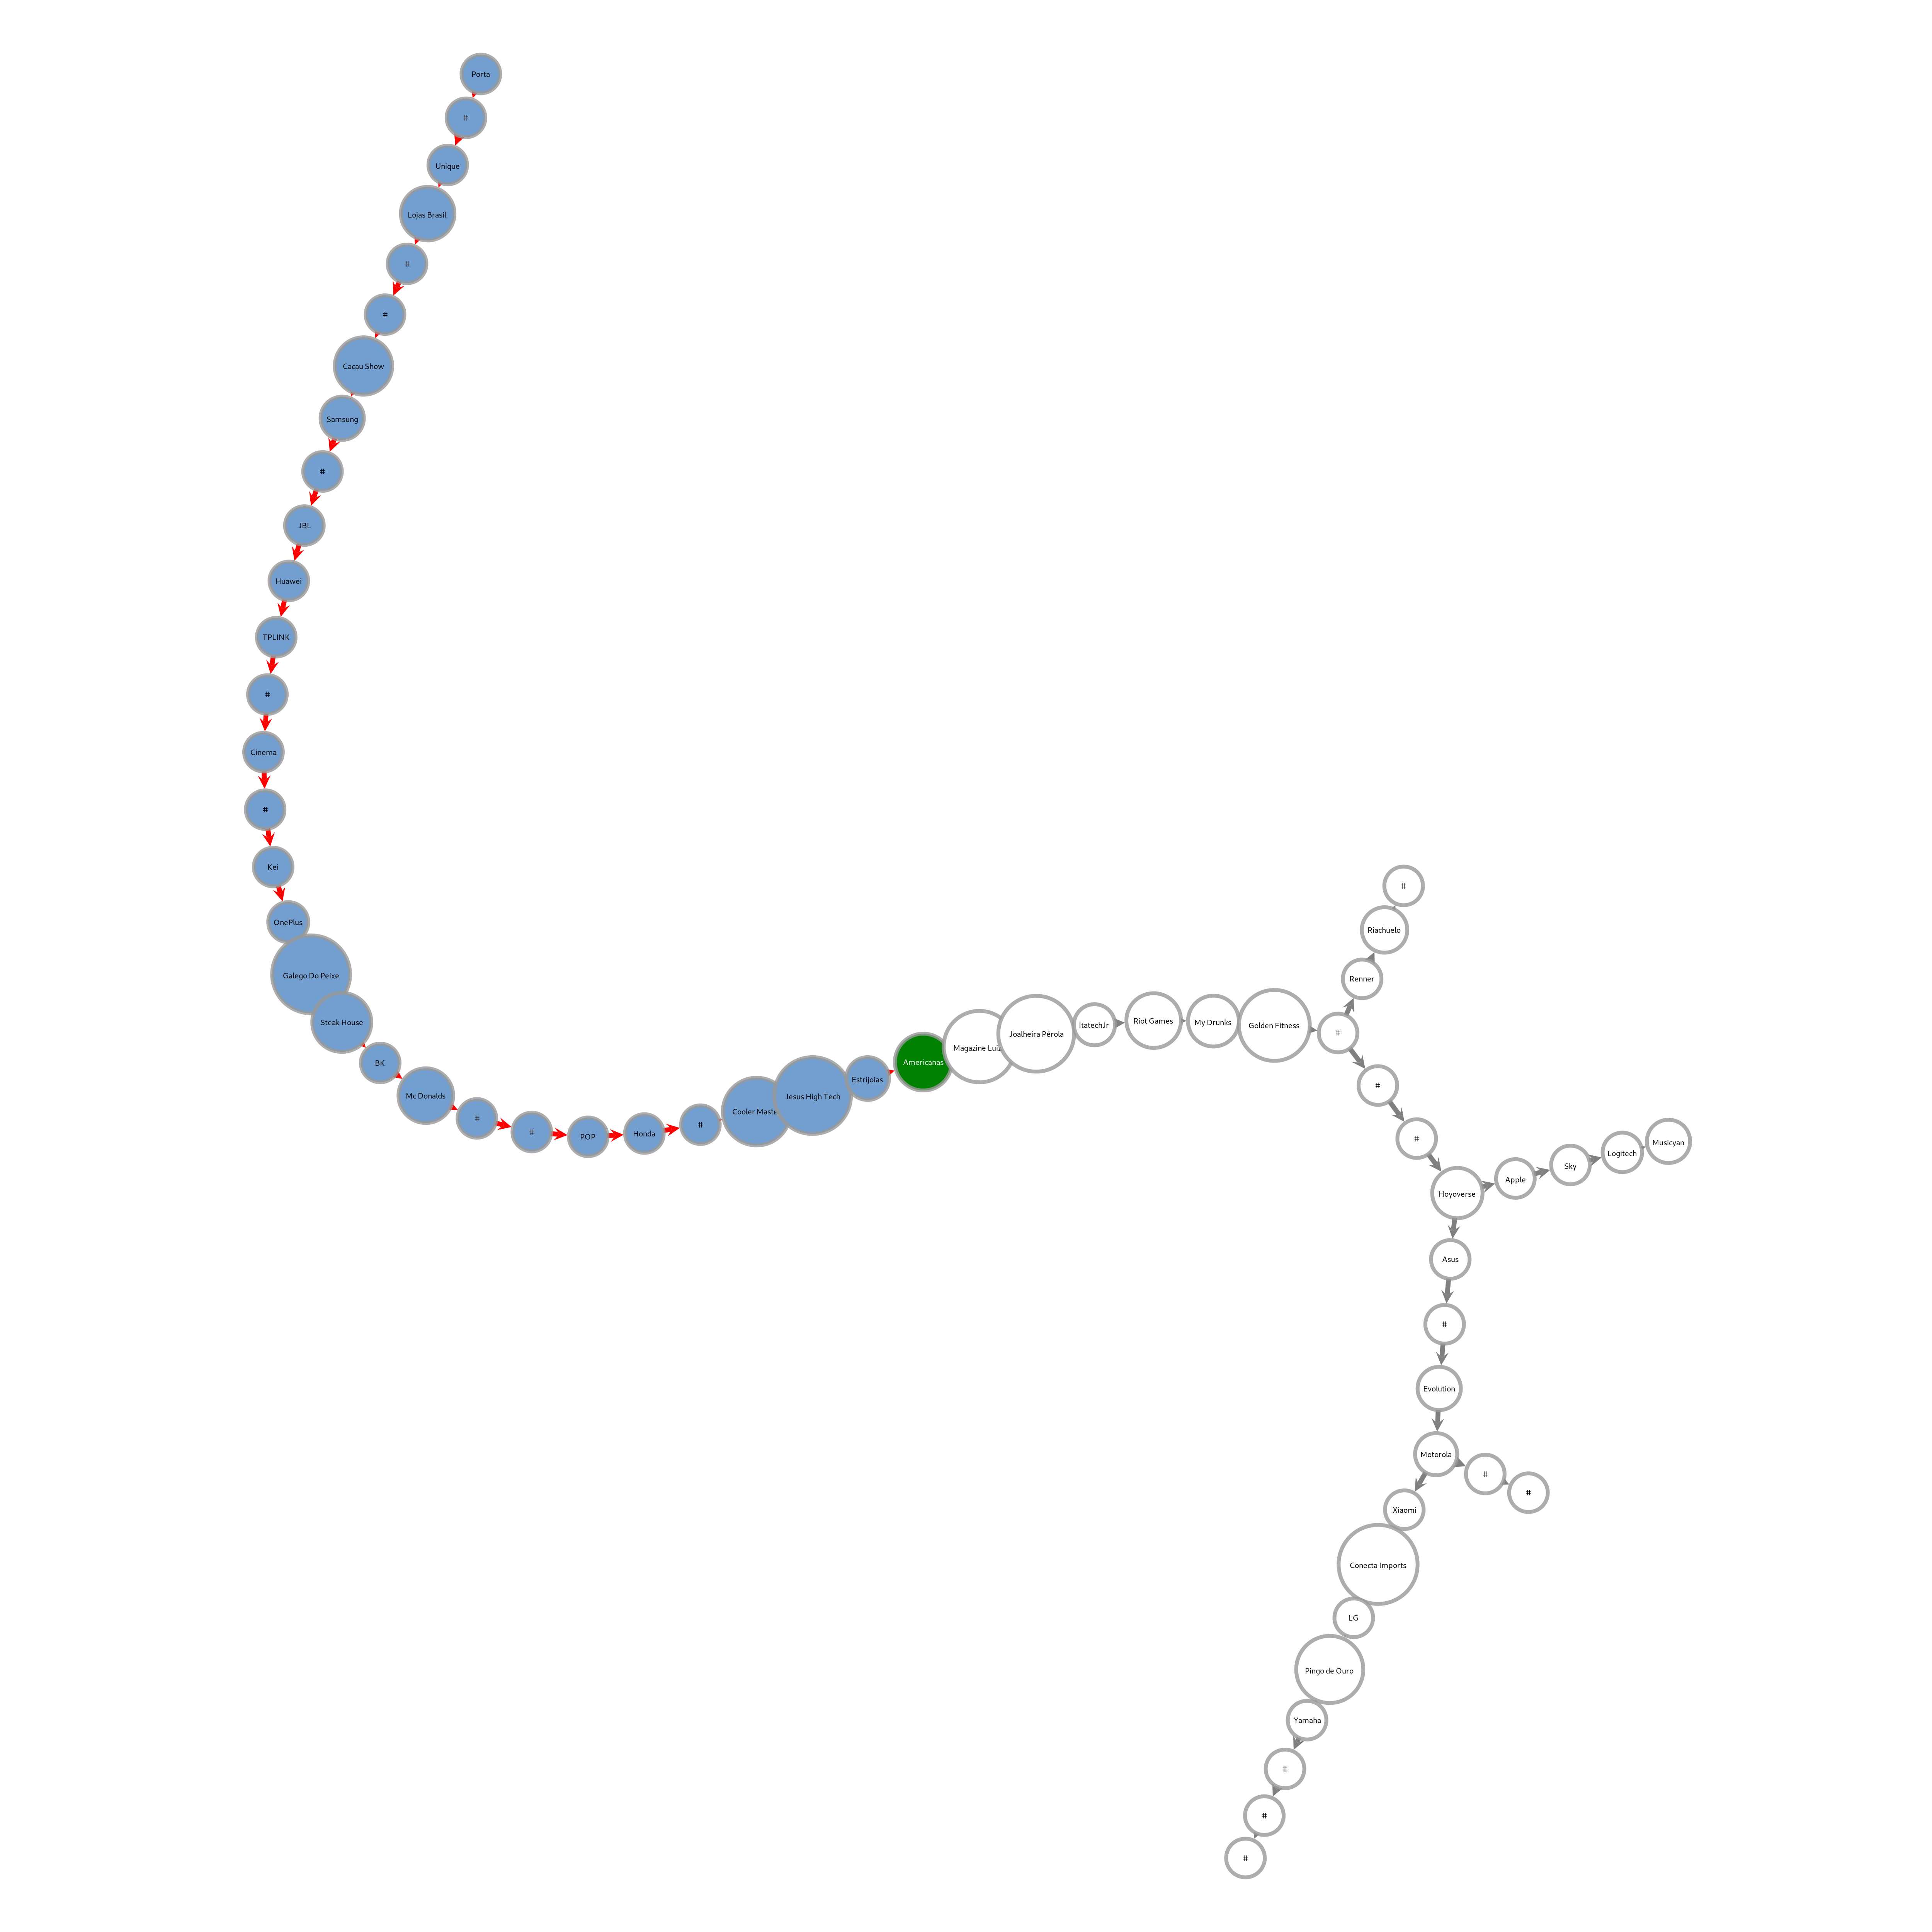

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8143da8860, at 0x7f8143e23f28>

In [35]:
g_dfs = gt.Graph()                                      # criação do objeto para busca em Profundidade
dfsv_name       = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_dfs com uma nova propriedade do vértice para o nome - tipo string 
dfsv_time       = g_dfs.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
dfsv_name_time  = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
dfsv_color      = g_dfs.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
dfsv_dist       = g_dfs.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
dfsv_pred       = g_dfs.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
dfse_color      = g_dfs.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
dfse_action     = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string
dfse_ord        = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string

print("---------------------------------------------")
print("> Busca em Profundidade - Caminhamento pelos Estados")
print("---------------------------------------------\n")
raiz = 'Porta'
alvo = 'Americanas'


index_raiz = list(v_name).index(raiz)
#print(list(v_name))
#print(list(v_name).index(raiz))
gt.dfs_search(g, g.vertex(index_raiz), VisitorExample(dfsv_name, dfsv_time, dfsv_name_time, dfsv_color, dfsv_dist, dfsv_pred, dfse_color, dfse_action, dfse_ord))
#print(list(dfsv_name))

index_alvo = list(dfsv_name).index(alvo) # Localizando o índice do Estado a ser encontrado

dfsv_color[index_raiz] = "#729fcf"
dfsv_color[index_alvo] = "green"
path = []                                                    # array do caminho
path.insert(0,dfsv_name[index_alvo])                         # inserções sendo realizadas no início

while index_alvo != index_raiz:
  e = g_dfs.edge(dfsv_pred[index_alvo], index_alvo)
  dfse_color[e] = "red"
  index_alvo = dfsv_pred[index_alvo]
  path.insert(0,dfsv_name[index_alvo])
  dfsv_color[index_alvo] = "#729fcf"
  
dfsv_color[index_raiz] = "#729fcf"; 
print("Cores Vértices.........:", list(dfsv_color))

print("Caminho encontrado.....:",path)

size = 5000
v_size = size / 50
e_pwidth = v_size / 8

size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_dfs, #pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= dfsv_name,
              edge_color= dfse_color,
              vertex_font_size=20,
              edge_font_size = 8,
              edge_pen_width = e_pwidth,
              vertex_fill_color=dfsv_color,              
              vertex_shape="circle",
              #vertex_fill_color="#729fcf",
              output_size=(size, size)) 


